In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/airline_passengers.csv",index_col = "Month",parse_dates=True)

In [8]:
df1.index.freq = 'MS'

In [9]:
df1

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
from statsmodels.tsa.stattools import adfuller

<Axes: xlabel='Month'>

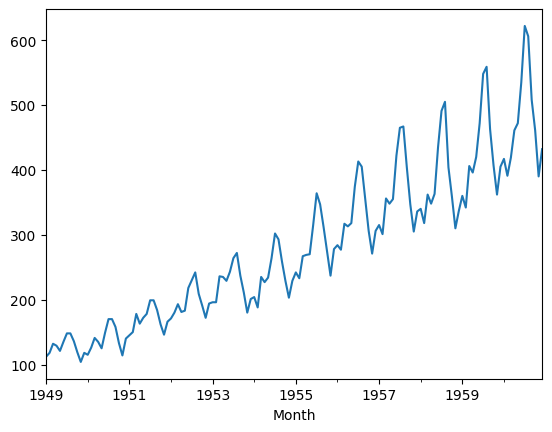

In [12]:
df1['Thousands of Passengers'].plot()

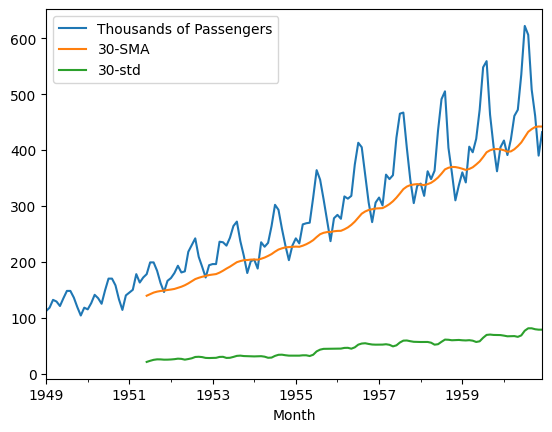

In [27]:
df1['30-SMA'] = df1['Thousands of Passengers'].rolling(window = 30).mean()
df1['30-std'] = df1['Thousands of Passengers'].rolling(window = 30).std()

df1[['Thousands of Passengers','30-SMA','30-std']].plot();

In [14]:
#1. Null hypothesis and Alternate Hypothesis = P-value P < 0.05 - we have 95% confidence againt the null hypotheses (strong evidence against)
#H0: Null Hypothesis = Series is non-stationary P > 0.05 - Non Stationary
#H1: Alternate hypotheses = Series is Stationary P < 0.05 - Series Stationary
print("Augmented Dicky-Fuller test on Airline Data")
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dicky-Fuller test on Airline Data


(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
dfout = pd.Series(dftest[0:4], index = ['ADF test statistic','p-vales','#-lags used','# observations'])
for key,val in dftest[4].items():
  dfout[f'Critical Values ({key})'] = val

In [19]:
dfout

ADF test statistic         0.815369
p-vales                    0.991880
#-lags used               13.000000
# observations           130.000000
Critical Values (1%)      -3.481682
Critical Values (5%)      -2.884042
Critical Values (10%)     -2.578770
dtype: float64

In [22]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/DailyTotalFemaleBirths.csv",index_col = 'Date',parse_dates = True)

In [24]:
df2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [23]:
df2.index.freq = 'D'

<Axes: xlabel='Date'>

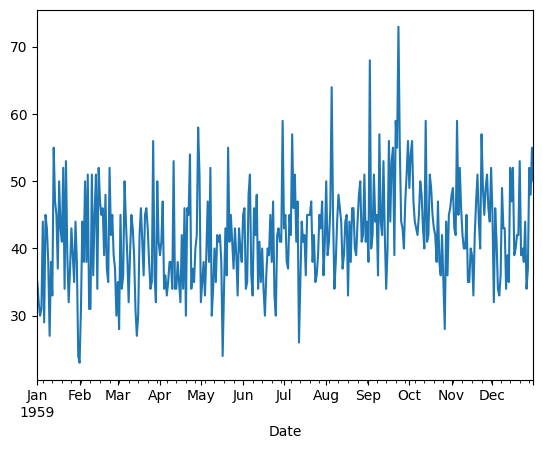

In [25]:
df2['Births'].plot()

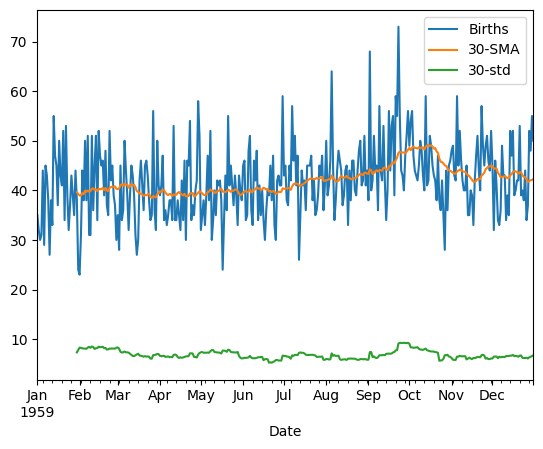

In [26]:
df2['30-SMA'] = df2['Births'].rolling(window = 30).mean()
df2['30-std'] = df2['Births'].rolling(window = 30).std()

df2[['Births','30-SMA','30-std']].plot();


In [28]:
#1. Null hypothesis and Alternate Hypothesis = P-value P < 0.05 - we have 95% confidence againt the null hypotheses (strong evidence against)
#H0: Null Hypothesis = Series is non-stationary P > 0.05 - Non Stationary
#H1: Alternate hypotheses = Series is Stationary P < 0.05 - Series Stationary
print("Augmented Dicky-Fuller test on Birth Data")
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4], index = ['ADF test statistic','p-vales','#-lags used','# observations'])
for key,val in dftest[4].items():
  dfout[f'Critical Values ({key})'] = val
dfout

Augmented Dicky-Fuller test on Birth Data


ADF test statistic        -4.808291
p-vales                    0.000052
#-lags used                6.000000
# observations           358.000000
Critical Values (1%)      -3.448749
Critical Values (5%)      -2.869647
Critical Values (10%)     -2.571089
dtype: float64